In [115]:
import random
import matplotlib.pyplot as plt
random.seed(42)

#### Function to calculate the midpoint displacement

In [116]:
def midpoint_displacement(points: list, roughness: float, init_disp: float, num_iter: int):
    vertical_displacement = init_disp
    for _ in range(num_iter):
        points_to_add = []
        for i in range(len(points) - 1):
            # Calculate the midpoint coordinates
            mid_x = (points[i][0] + points[i + 1][0]) / 2
            mid_y = (points[i][1] + points[i + 1][1]) / 2
            # Calculate the random vertical displacement
            displacement = (random.random() - 0.5) * vertical_displacement * 2
            # Calculate the final y-coordinate of the displaced midpoint
            new_point = (mid_x, mid_y + displacement)
            points_to_add.append((i + 1, new_point))
        # Insert the points in reverse order
        points_to_add.sort(key=lambda x: x[0], reverse=True)
        for index, point in points_to_add:
            points.insert(index, point)
        # Decrease the displacement range Dᵢ₊₁ = Dᵢ * 2⁻ᴴ 
        vertical_displacement *= (2**(-roughness))
    return points

#### Function to calculate geometry for all terrains across multiple iterations

In [117]:
def calculate_terrains_geometry(
        canvas_width: float,
        num_iter: int,
        roughnesses: list,
        start_heights: list,
        altitude_diffs: list,
        amplitude_factors: list):
    generated_points_data = []
    for i in range(len(roughnesses)):
        # Calculate the starting and ending y-coordinate with random variations
        start_y = start_heights[i] + (random.random() - 0.5) * altitude_diffs[i]
        end_y = start_heights[i] + (random.random() - 0.5) * altitude_diffs[i]
        # Define the initial start and end points
        start_point = (0.0, start_y)
        end_point = (float(canvas_width), end_y)
        # Calculate initial displacement amplitude D₀ = W * f
        initial_disp = canvas_width * amplitude_factors[i]
        # Generate the terrain points using the midpoint displacement
        generated_points_data.append(midpoint_displacement(
            [start_point, end_point], roughnesses[i],
            initial_disp, num_iter=num_iter
        ))
    return generated_points_data

#### Visualize the generated terrains

In [118]:
def visualize_terrains(points_per_layer: list, colors: list, canvas_width: float):
    fig, ax = plt.subplots(figsize=(10, 5))
    all_y_coords = []
    for layer_points, color in zip(points_per_layer, colors):
        x_coords, y_coords = zip(*layer_points)
        all_y_coords.extend(y_coords)
        ax.fill_between(x_coords, y_coords, -1000, color=color, alpha=1.0, linewidth=0)
    ax.set_xlim(0, canvas_width)
    min_y_overall = min(all_y_coords) if all_y_coords else 0
    max_y_overall = max(all_y_coords) if all_y_coords else 300
    ax.set_ylim(min_y_overall - 50, max_y_overall + 50)
    ax.axis('off')
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

In [119]:
width = 1000
roughnesses = [0.75, 0.9, 0.8]
start_heights = [250, 100, 0]
amplitude_factors = [0.25, 0.03, 0.05]
altitude_diffs = [20, 30, 40]

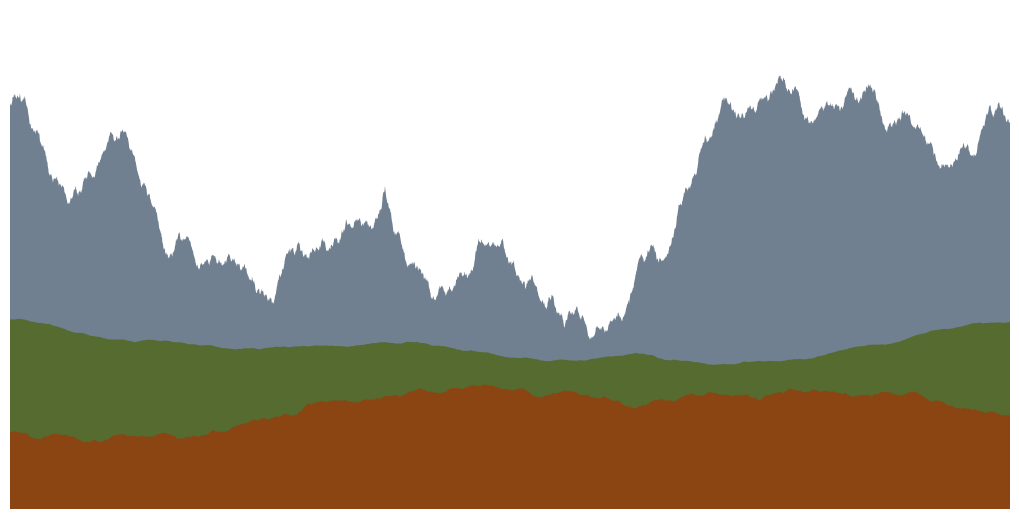

In [120]:
points_per_layer = calculate_terrains_geometry(
    canvas_width = width, 
    num_iter = 12, 
    roughnesses = roughnesses, 
    start_heights = start_heights, 
    altitude_diffs = altitude_diffs, 
    amplitude_factors = amplitude_factors
)
colors = ['slategray', 'darkolivegreen', 'saddlebrown']
visualize_terrains(points_per_layer, colors, width)